In [3]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 13.5 MB/s 


In [4]:
## Importing required packages
import unidecode
import string
import random
import re

In [6]:
all_characters = string.printable
## code to find length of all_characters and storing the value in n_characters
n_characters = len(all_characters)
## code to convert unicode characters into plain ASCII.
file = unidecode.unidecode(open('shakespeare.txt').read())
## code to find length of the file
file_len = len(file)
## printing the length of the file
print('file_len =', file_len)

file_len = 1115393


In [7]:
## Initializing the length of chunk
chunk_len = 200
## Function to split the string into chunks
def random_chunk():
    ## Initializing the starting index value of the big string 
    start_index = random.randint(0, file_len - chunk_len)
    ## Initializing the ending index of the string 
    end_index = start_index + chunk_len + 1
    ## returning the chunk
    return file[start_index:end_index]

print(random_chunk())

g all, Guilty! guilty!
I shall despair. There is no creature loves me;
And if I die, no soul shall pity me:
Nay, wherefore should they, since that I myself
Find in myself no pity to myself?
Methought t


In [8]:
###importing required packages
import torch
import torch.nn as nn
from torch.autograd import Variable

### Creating recurrent neural network
class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [9]:
# Turn string into list of longs
def char_tensor(string):
    ## tensor is a array
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


In [10]:
def random_training_set():    
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [11]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)

    return predicted

In [12]:
## Importing required packages
import time, math
## function to print amount of time passed
def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [13]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c].unsqueeze(0))

    loss.backward()
    decoder_optimizer.step()

    return loss.data.item() / chunk_len

In [14]:
n_epochs = 2000 #Number of epochs
print_every = 50
plot_every = 20
hidden_size = 100
n_layers = 1
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
## Optimizer
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
## Loss function
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

#In this for loop for every 100th iteration we are printing the time taken, loss and the chunk.
for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())       
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 6s (50 2%) 2.4009]
Whow.


The.
WAithe sero I s sse theu, wou u rour rord ter thersde nou seatd ourendll ine I nod ther m 

 11s (100 5%) 2.3596]
Whef nown, to fay, ing mive show lar.

PRINCHARIARA:
Bhing wenir you mind beill ome row ar'd geal thou 

 15s (150 7%) 2.3623]
Whe me of pow:
Iwe you lowe, soy pether haubend:
Wet this havids ya,
noo ke me wid'd heat shat in seib 

 20s (200 10%) 2.1134]
What the seughen win falell frisplat fait.

DUKE wIO:
I heat ind, the mis,
Por hat but bleer and wis a 

 29s (250 12%) 2.1913]
Whant,
Oger fredds promy dlowe it shat the hean fall of, the and be goolor to the be nom all, goo raut 

 35s (300 15%) 2.2063]
Whargher wodiece sun'd Mure, stare
no pame burtand breellou is gefo, and mack at this your made parke
 

 41s (350 17%) 2.1550]
Whe cove comon houder and you have bloon'd sith not it ceard, Is lobloning kore ir that, le the such o 

 46s (400 20%) 2.0535]
Whis sinesly to goord,
And wive, in weth were and would may,
And well with.

GLOUCENTO

Text(0, 0.5, 'loss')

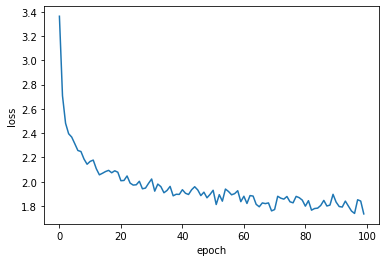

In [15]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)
plt.xlabel("epoch")
plt.ylabel("loss")

In [16]:
print(evaluate('u', 200, temperature=0.8))

ure do mesion,
-shan our comsed a prine,
These which that wather and the are the him have deef,
Dome a kinded the than a movery fellovep:
There'd and the prinches hath him, your of
come than there his 


In [17]:
print(evaluate('how', 200, temperature=1.4))

howk?bO:
Tue your hio houm war: you wancy:
te to yould heo to forts harto o'thind you hull a grabuinmtan.
ere'bit an: Clafelfnt, puttige.

GdWbLaEN sir,
EZAdnion cooffel's we nuttighinke, our undiens.
St
